In [82]:
import cv2
import matplotlib.pyplot as plt
from utils.imutils import displayImage
import numpy as np
%matplotlib inline

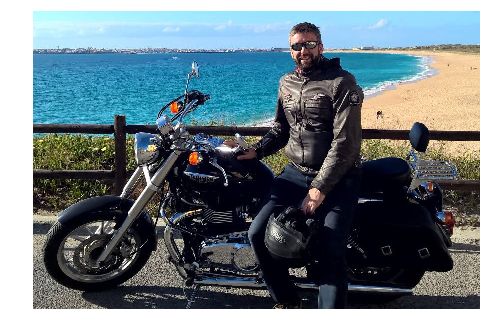

In [83]:
#load and display image
image = cv2.imread('images/photo.jpg')
displayImage(image)

## Translate

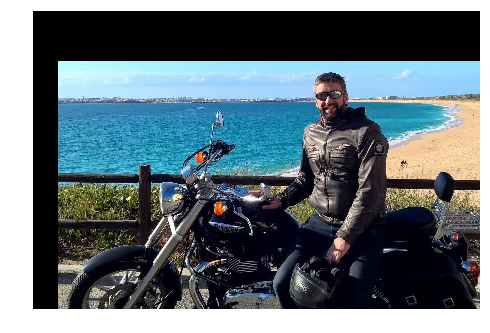

In [84]:
shifted = imutils.translate(image, 50, 100)
displayImage(shifted)

## Rotate

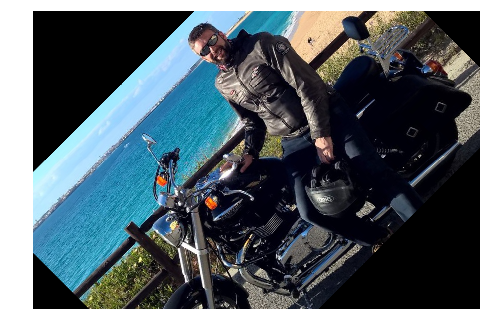

In [85]:
rotated = imutils.rotate(image, 45)
displayImage(rotated)

## Resize

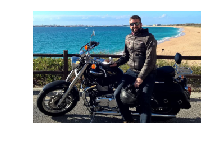

Original image size:  (600, 899, 3)
Resized image size:  (200, 299, 3)


In [86]:
resized = imutils.resize(image, height=200)
displayImage(resized, figSize=(3,3))
print('Original image size: ', image.shape)
print('Resized image size: ', resized.shape)

## Flip

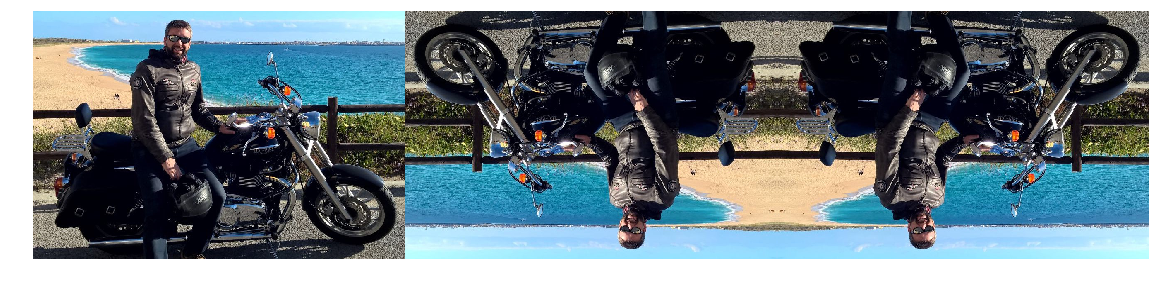

In [87]:
flipped_h = cv2.flip(image, 1)

flipped_v = cv2.flip(image, 0)

flipped_b = cv2.flip(image, -1)

comp = np.hstack([flipped_h, flipped_v, flipped_b])
displayImage(comp, figSize=(20,6))

## Crop

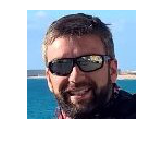

In [88]:
cropped = image[20:120, 500:600]
displayImage(cropped, figSize=(2,2))

## Ligher and Darker through arithmetic

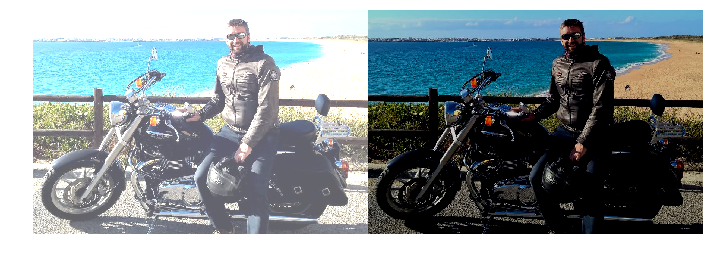

In [89]:
M = np.ones(image.shape, dtype='uint8') * 100
added = cv2.add(image, M)

M = np.ones(image.shape, dtype='uint8') * 50
subtracted = cv2.subtract(image, M)

comp = np.hstack([added, subtracted])
displayImage(comp, figSize=(12,6))

## Masking

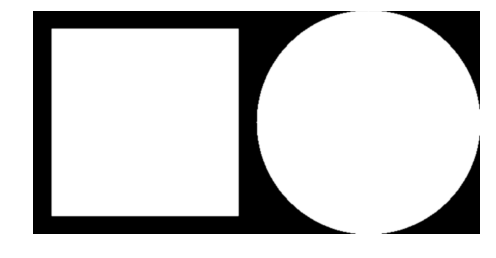

In [90]:
# First, let's draw a rectangle
rectangle = np.zeros((300, 300), dtype = "uint8")
cv2.rectangle(rectangle, (25, 25), (275, 275), 255, -1)

# Secondly, let's draw a circle
circle = np.zeros((300, 300), dtype = "uint8")
cv2.circle(circle, (150, 150), 150, 255, -1)

comp = np.hstack([rectangle, circle])
displayImage(comp)

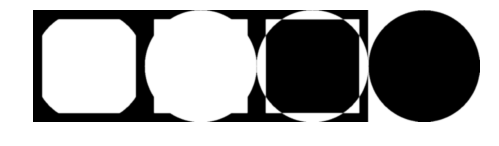

In [91]:
bitwiseAnd = cv2.bitwise_and(rectangle, circle)

bitwiseOr = cv2.bitwise_or(rectangle, circle)

bitwiseXor = cv2.bitwise_xor(rectangle, circle)

bitwiseNot = cv2.bitwise_not(circle)

comp = np.hstack([bitwiseAnd, bitwiseOr, bitwiseXor, bitwiseNot])
displayImage(comp)

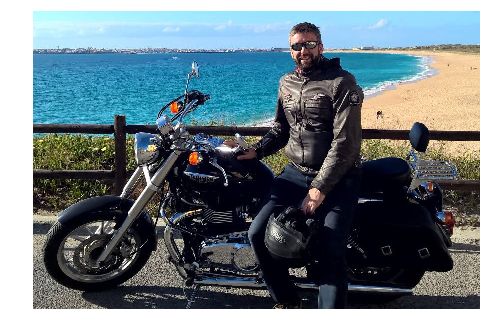

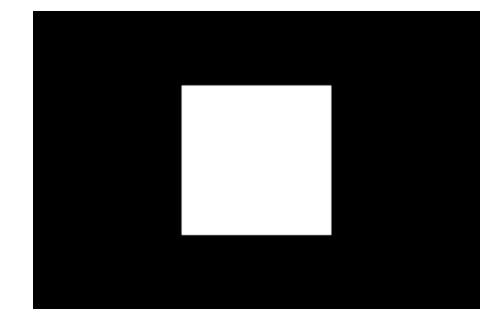

In [92]:
mask = np.zeros(image.shape[:2], dtype = "uint8")
(cX, cY) = (image.shape[1] // 2, image.shape[0] // 2)
cv2.rectangle(mask, (cX - 150, cY - 150), (cX + 150 , cY + 150), 255, -1)
displayImage(image)
displayImage(mask)

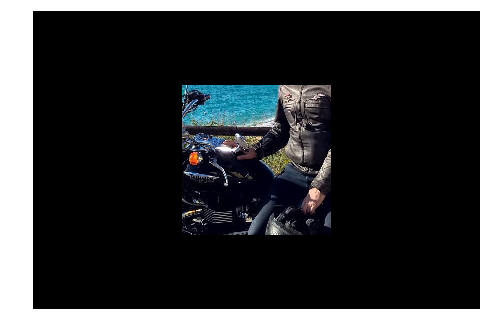

In [93]:
masked = cv2.bitwise_and(image, image, mask = mask)
displayImage(masked)

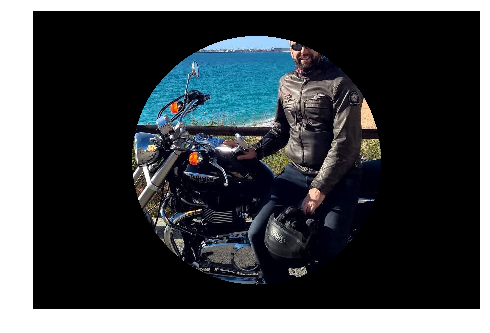

In [94]:
mask = np.zeros(image.shape[:2], dtype = "uint8")
cv2.circle(mask, (cX, cY), 250, 255, -1)
masked = cv2.bitwise_and(image, image, mask = mask)
displayImage(masked)

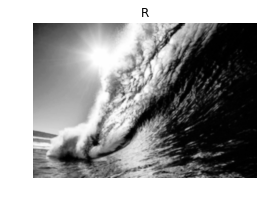

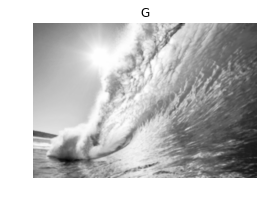

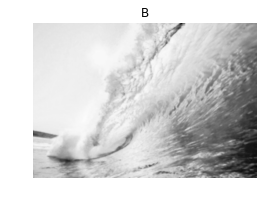

In [95]:
image = cv2.imread('images/wave.png')
(B, G, R) = cv2.split(image)

# Show each channel individually

displayImage(R, title='R', figSize=(4,4))
displayImage(G, title='G', figSize=(4,4))
displayImage(B, title='B', figSize=(4,4))

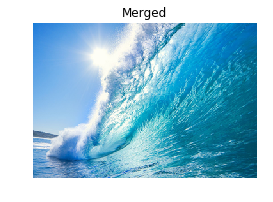

In [96]:
merged = cv2.merge([B, G, R])
displayImage(merged, title='Merged', figSize=(4,4))

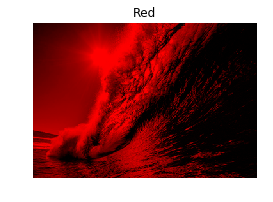

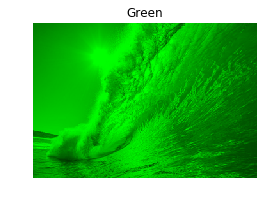

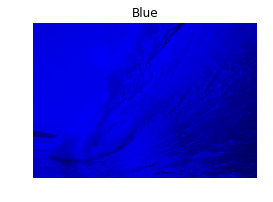

In [97]:
# Now, let's visualize each channel in color
zeros = np.zeros(image.shape[:2], dtype = "uint8")
displayImage(cv2.merge([zeros, zeros, R]), figSize=(4,4), title = "Red")
displayImage(cv2.merge([zeros, G, zeros]), figSize=(4,4), title = "Green")
displayImage(cv2.merge([B, zeros, zeros]), figSize=(4,4), title = "Blue")